# Librerías

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Carga de datos

In [69]:
# 'URL_DEL_ARCHIVO_CSV' del archivo CSV del train balanceado
url = '/content/drive/MyDrive/train_balanceado.csv'

try:
    df_train_balanceado = pd.read_csv(url)
    print("Archivo cargado corecto de train balanceado")
except Exception as e:
    print(f"Error al cargar el archivo CSV de train balanceado: {e}")

Archivo cargado corecto de train balanceado


In [70]:
# Muestra las primeras filas del DataFrame
df_train_balanceado.head().T

,0,1,2,3,4
category,home,misc_net,entertainment,shopping_pos,grocery_net
amt,15.0,109.96,10.43,5.71,39.7
city,Moriarty,Burbank,Eugene,Redford,Arnold
state,New Mexico,Washington,Oregon,Missouri,Missouri
lat,34.9889,46.1966,44.0385,37.3272,38.4305
long,-106.0609,-118.9017,-123.0614,-91.0243,-90.387
city_pop,7268,3684,191096,241,35439
merch_lat,35.191886,45.563869,44.708545,36.85701,38.952935
merch_long,-105.832554,-118.076592,-122.072096,-91.002408,-90.990324
age,31,39,55,46,35


In [71]:
# 'URL_DEL_ARCHIVO_CSV' del archivo CSV del test
url = '/content/drive/MyDrive/test.csv'

try:
    df_test = pd.read_csv(url)
    print("Archivo cargado corecto de test")
except Exception as e:
    print(f"Error al cargar el archivo CSV de test: {e}")

Archivo cargado corecto de test


In [72]:
# Muestra las primeras filas del DataFrame
df_test.head().T

,0,1,2,3,4
category,home,grocery_net,shopping_net,travel,misc_pos
amt,30.02,48.31,80.94,5.28,68.7
city,Arnold,Dumont,Blairsden-Graeagle,Cascade Locks,Sun City
state,Missouri,Colorado,California,Oregon,California
lat,38.4305,39.7532,39.8127,45.671,33.7467
long,-90.387,-105.6356,-120.6405,-121.8686,-117.1721
city_pop,35439,565,1725,1288,54287
merch_lat,39.256111,40.504011,39.595713,46.504832,33.932468
merch_long,-91.262386,-106.561224,-120.16454,-121.68543,-116.294259
age,35,41,53,83,47


In [73]:
# Columnas de df_train_balanceado
df_train_balanceado.columns

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant', 'is_fraud'],
      dtype='object')

In [74]:
# Columnas de df_test
df_test.columns

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant', 'is_fraud'],
      dtype='object')

# EDA

In [75]:
# Muestra información del DataFrame df_train_balanceado
df_train_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  20160 non-null  object 
 1   amt                       20160 non-null  float64
 2   city                      20160 non-null  object 
 3   state                     20160 non-null  object 
 4   lat                       20160 non-null  float64
 5   long                      20160 non-null  float64
 6   city_pop                  20160 non-null  int64  
 7   merch_lat                 20160 non-null  float64
 8   merch_long                20160 non-null  float64
 9   age                       20160 non-null  int64  
 10  transaction_hour          20160 non-null  int64  
 11  transaction_day_of_month  20160 non-null  int64  
 12  transaction_month         20160 non-null  int64  
 13  transaction_year          20160 non-null  int64  
 14  transa

# Preprocesamiento

Separando los datos en X_train, y_train, X_test, y_test

In [76]:
# X_train todas las columnas de df_train_balanceado menos 'is_fraud'
X_train = df_train_balanceado.drop('is_fraud', axis=1)

In [77]:
# y_train solo columna 'is_fraud' de df_train_balanceado
y_train =  df_train_balanceado['is_fraud']

In [78]:
# X_test todas las columnas de df_test menos 'is_fraud'
X_test = df_test.drop('is_fraud', axis=1)

In [79]:
# y_test solo columna 'is_fraud' de df_test
y_test =  df_test['is_fraud']

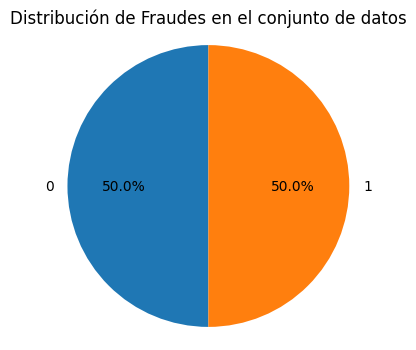

In [80]:
# Verifica si la columna 'is_fraud' existe en el DataFrame
if 'is_fraud' in df_train_balanceado.columns:
    # Cuenta la cantidad de cada valor en la columna 'is_fraud'
    conteo_fraude = df_train_balanceado['is_fraud'].value_counts()

    # Crea el gráfico de pastel
    plt.figure(figsize=(4, 4))
    plt.pie(conteo_fraude, labels=conteo_fraude.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Fraudes en el conjunto de datos')
    plt.axis('equal')  # Asegura que el gráfico sea un círculo
    plt.show()
else:
    print("La columna 'is_fraud' no se encuentra en el DataFrame.")

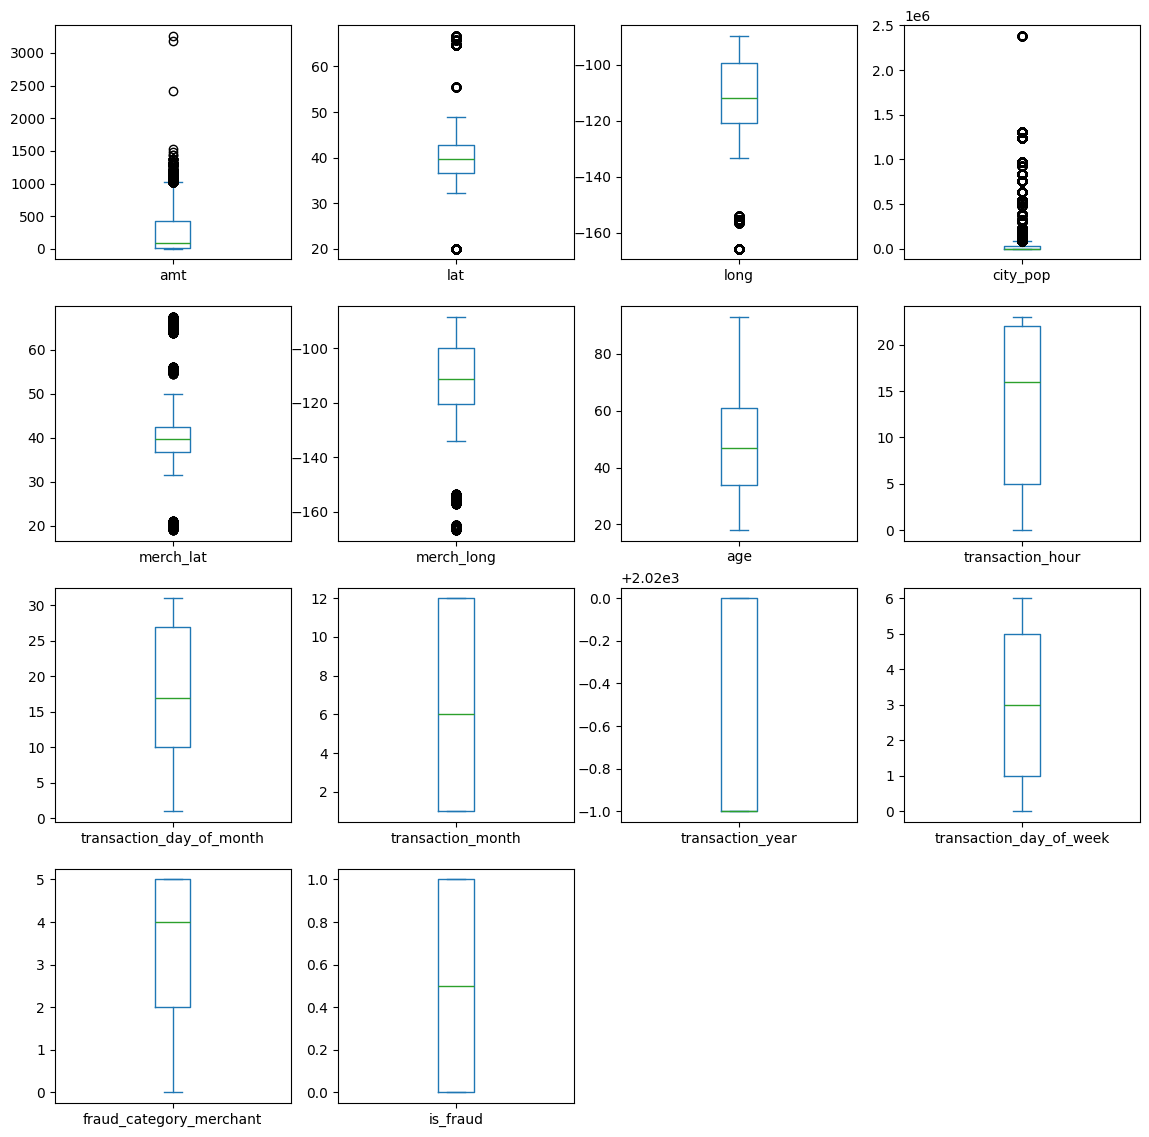

In [81]:
# Diagrana boxplot para visualizar los Outliers
df_train_balanceado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

In [82]:
# ----- Función para rastreo del mejor percentil superior para ajuste de outliers superiores
def HallaMejorPercentilSup(micol,  maximo, minimo, miCotaSup, dataframeA):
	for x in range(maximo, minimo, -1):
		valor_tope_actual = np.quantile(dataframeA.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaSup = {miCotaSup}")
		if(valor_tope_actual <= miCotaSup):
			return x , valor_tope_actual

# Proceso de corrección de Outlier Superior en train
columnas =  [1, 4, 6, 7]
for col in columnas:
  q3=np.quantile(df_train_balanceado.iloc[ : , col] , 0.75)
  q1=np.quantile(df_train_balanceado.iloc[ : , col] , 0.25)
  IQR=q3-q1
  CotaSup=q3+1.5*IQR
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_train_balanceado)
  df_train_balanceado.iloc[ : , col] = np.where(df_train_balanceado.iloc[ : , col] > ValorTecho, ValorTecho, df_train_balanceado.iloc[ : , col] )

Percentil 99 = 1145.9,col = 1, CotaSup = 1017.84375
Percentil 98 = 1113.2,col = 1, CotaSup = 1017.84375
Percentil 97 = 1076.3,col = 1, CotaSup = 1017.84375
Percentil 96 = 1051.8,col = 1, CotaSup = 1017.84375
Percentil 95 = 1029.2,col = 1, CotaSup = 1017.84375
Percentil 94 = 1005.3,col = 1, CotaSup = 1017.84375
Percentil 99 = 64.7556,col = 4, CotaSup = 51.75189999999999
Percentil 98 = 48.8878,col = 4, CotaSup = 51.75189999999999
Percentil 99 = 1312922.0,col = 6, CotaSup = 87834.0
Percentil 98 = 1241364.0,col = 6, CotaSup = 87834.0
Percentil 97 = 973849.0,col = 6, CotaSup = 87834.0
Percentil 96 = 927396.0,col = 6, CotaSup = 87834.0
Percentil 95 = 757530.0,col = 6, CotaSup = 87834.0
Percentil 94 = 641349.0,col = 6, CotaSup = 87834.0
Percentil 93 = 545147.0,col = 6, CotaSup = 87834.0
Percentil 92 = 518429.0,col = 6, CotaSup = 87834.0
Percentil 91 = 389246.0,col = 6, CotaSup = 87834.0
Percentil 90 = 320420.0,col = 6, CotaSup = 87834.0
Percentil 89 = 233717.0,col = 6, CotaSup = 87834.0
Perce

<ipython-input-82-b88128b5f4b9>:16: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_train_balanceado)


In [83]:
# ----- Función creada para rastreo del mejor percentil inferior para ajuste de outliers inferiores
def HallaMejorPercentilInf(micol,  minimo, maximo, miCotaInf, dataframe):
	valor_tope_previo = 0
	valor_x_previo = 0
	for x in range(minimo, maximo, +1):
		valor_tope_actual = np.quantile(dataframe.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaInf = {miCotaInf}")
		if(valor_tope_actual >= miCotaInf):
			return x, valor_tope_actual

# Proceso de corrección de Outlier Inferior en train
columnas =  [4, 5, 7, 8]
for col in columnas:
  q3=np.quantile(df_train_balanceado.iloc[:,col] , 0.75)
  q1=np.quantile(df_train_balanceado.iloc[:,col] , 0.25)
  IQR=q3-q1
  CotaInf=q1-1.5*IQR
  PercentilInfSugerido , ValorPiso = HallaMejorPercentilInf(col, 1, 20, CotaInf, df_train_balanceado)
  df_train_balanceado.iloc[:, col] = np.where(df_train_balanceado.iloc[:, col] < ValorPiso, ValorPiso, df_train_balanceado.iloc[:, col] )

Percentil 1 = 20.0827,col = 4, CotaInf = 27.69350000000001
Percentil 2 = 32.9396,col = 4, CotaInf = 27.69350000000001
Percentil 1 = -156.292,col = 5, CotaInf = -152.58565000000002
Percentil 2 = -155.3697,col = 5, CotaInf = -152.58565000000002
Percentil 3 = -133.1171,col = 5, CotaInf = -152.58565000000002
Percentil 1 = 20.9154896,col = 7, CotaInf = 28.516483874999995
Percentil 2 = 32.5269501,col = 7, CotaInf = 28.516483874999995
Percentil 1 = -156.529734,col = 8, CotaInf = -151.228452
Percentil 2 = -155.13979434,col = 8, CotaInf = -151.228452
Percentil 3 = -132.392044,col = 8, CotaInf = -151.228452


<ipython-input-83-602fa0814d1d>:18: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  PercentilInfSugerido , ValorPiso = HallaMejorPercentilInf(col, 1, 20, CotaInf, df_train_balanceado)


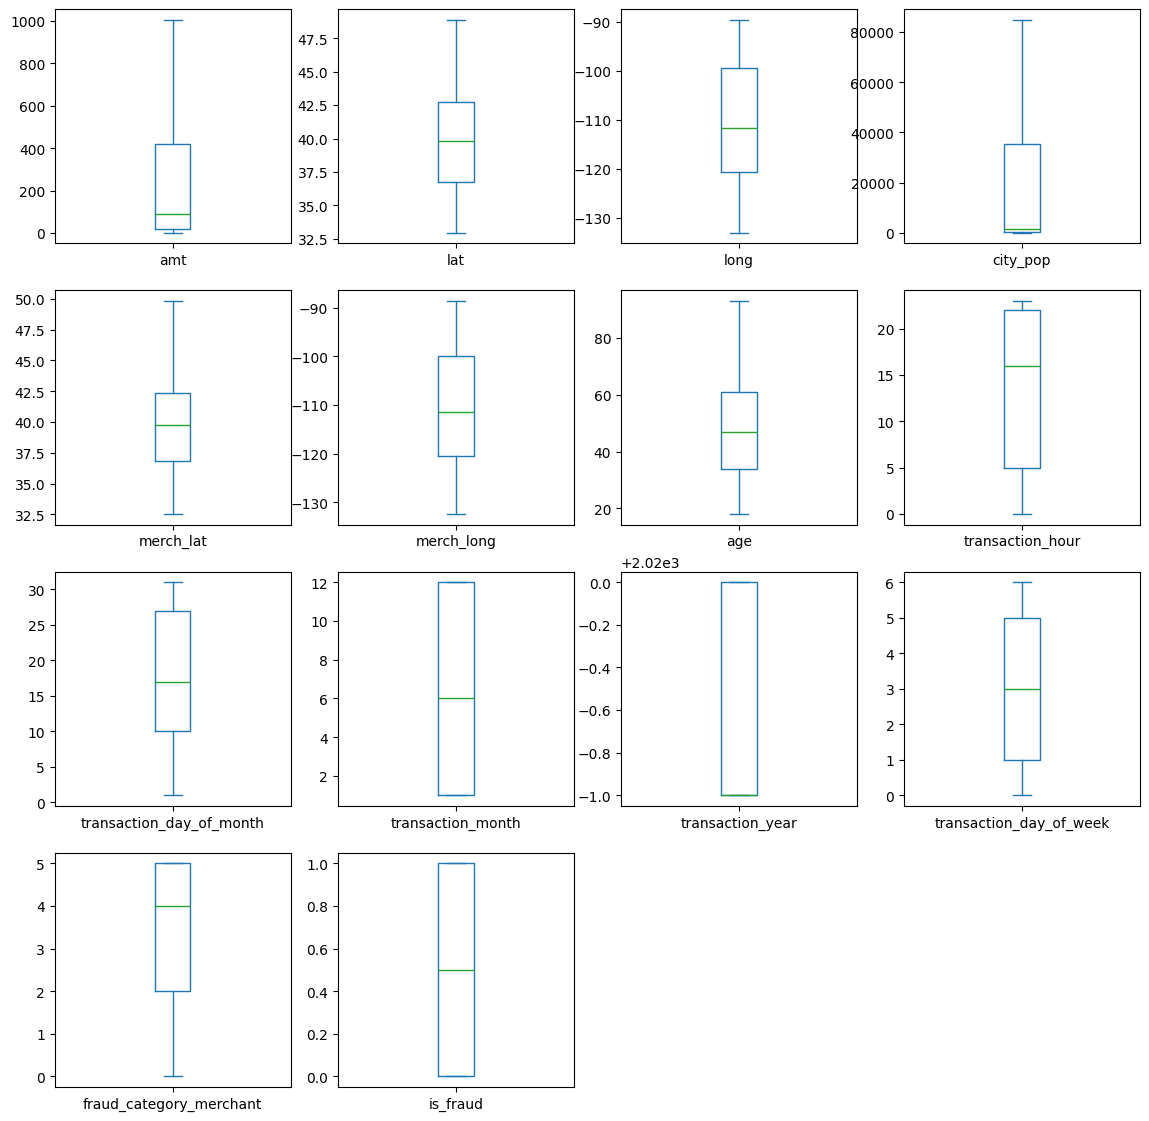

In [84]:
# Diagrana boxplot para verificar que no hay Outliers
df_train_balanceado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

Se obtiene los nuevos valores de train sin valores Outliers

In [85]:
# X_train todas las columnas de df_train_balanceado menos 'is_fraud'
X_train_sin_atipico = df_train_balanceado.drop('is_fraud', axis=1)

In [86]:
# y_train solo columna 'is_fraud' de df_train_balanceado
y_train_sin_atipico =  df_train_balanceado['is_fraud']

**Los datos están listos en:**

X_train: datos train con atípicos

y_train: datos train con atípicos

X_train_sin_atipico: datos train sin atípicos

y_train_sin_atipico: datos train sin atípicos

X_test: datos de test

y_test: datos de test


**Nota 1:**

Usar los train de acuerdo al algoritmo si soporta o no datos atípicos en el train, en relación al test no se ha manejado ni balanceo ni eliminación de atípicos.

Solo faltaría que utilicen StandarScaler a las X tanto de X_train como X_test antes del entrenamiento.

Pero NO escalar a los algoritmos que no son necesarios escalar las variables como árbol de decisión y random forest.



**Nota 2:**

**Ahora están todas las variables en el train y en el test:**

'category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year', 'transaction_day_of_week', 'profession_group', 'fraud_category_merchant', 'is_fraud'

**En la red MLP se utilizó:**

'category', 'amt', 'city_pop', 'age', 'transaction_hour', 'transaction_day_month', 'transaction_month', 'profession_group', 'fraud_category_merchant', 'is_fraud'

**Entradas consensuadas:**

'category', 'amt', 'city', 'state',
       'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_day_of_week',
       'profession_group', 'fraud_category_merchant'
       
**Salida:**
      'is_fraud'

**Conclusiones antes del modelamiento**

1. Deben eliminar del Xtrain, Xtest las variables que no consideren antes del entrenamiento.

2. Usar el escalador StandarScaler si lo necesita el algoritmo

3. Usar labelencoder y/o onethotencoder a las variables 'category', 'profession_group', 'city', 'state'

4. La variable 'fraud_category_merchant' ya tiene su peso 0:no fraude, 1:muy bajo fraude, 2:bajo fraude, 3:intemedio fraude, 4:alto fraude, 5:muy alto fraude, además es ya de tipo entero por lo que no necesita ser codificada
       

# Selección de Variables y Codificación

In [87]:
# X_train_sin_atipico, y_train_sin_atipico, X_test, y_test ===> VARIABLES A USAR

In [88]:
# copia de X_train_sin_atipico y X_test
X_train_copy = X_train_sin_atipico.copy()
X_test_copy = X_test.copy()

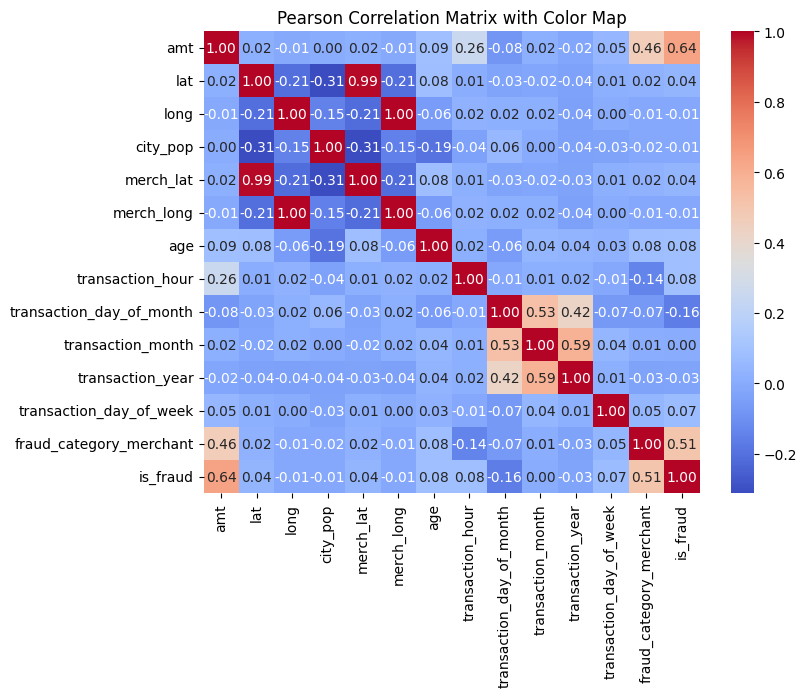

In [89]:
# Select numerical columns from df_train_balanceado
numerical_cols = df_train_balanceado.select_dtypes(include=['number'])

# Calculate the Pearson correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap with a color map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix with Color Map')
plt.show()

In [90]:
# Obtener las columnas numéricas de X_train_sin_atipico
columnas_numericas = X_train_sin_atipico.select_dtypes(include=['number']).columns

# Imprimir las columnas numéricas
columnas_numericas

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age',
       'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week',
       'fraud_category_merchant'],
      dtype='object')

In [91]:
# Obtener las columnas categóricas  X_train_sin_atipico
columnas_categoricas = X_train_sin_atipico.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas
columnas_categoricas

Index(['category', 'city', 'state', 'profession_group'], dtype='object')

In [92]:
# Inicializa LabelEncoder
encoder = LabelEncoder()

# Ajusta y transforma la columna 'category' en X_train_sin_atipico
X_train_sin_atipico['category'] = encoder.fit_transform(X_train_sin_atipico['category'])

# Ajusta y transforma la columna 'city' en X_train_sin_atipico
X_train_sin_atipico['city'] = encoder.fit_transform(X_train_sin_atipico['city'])

# Ajusta y transforma la columna 'state' en X_train_sin_atipico
X_train_sin_atipico['state'] = encoder.fit_transform(X_train_sin_atipico['state'])

# Ajusta y transforma la columna 'profession_group' en X_train_sin_atipico
X_train_sin_atipico['profession_group'] = encoder.fit_transform(X_train_sin_atipico['profession_group'])

In [93]:
# Transforma la columna 'category' en X_test
X_test['category'] = encoder.fit_transform(X_test['category'])

# Transforma la columna 'city' en X_test
X_test['city'] = encoder.fit_transform(X_test['city'])

# Transforma la columna 'state' en X_test
X_test['state'] = encoder.fit_transform(X_test['state'])

# Transforma la columna 'profession_group'
X_test['profession_group'] = encoder.fit_transform(X_test['profession_group'])

**Variables seleccionadas**

'category', 'amt', 'city', 'state', 'age',
    'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
    'profession_group', 'fraud_category_merchant'

In [94]:
# escoge las columnas definitivas para el train

X_train_sin_atipico_filtro = X_train_sin_atipico[['category', 'amt', 'city', 'state', 'age',
                                                  'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
                                                  'profession_group', 'fraud_category_merchant']]

In [95]:
# escoge las columnas definitivas para el test

X_test_filtro = X_test[['category', 'amt', 'city', 'state', 'age',
                        'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
                        'profession_group', 'fraud_category_merchant']]


# Reducción de dimensionalidad

In [96]:
from sklearn.manifold import TSNE
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=56)
X_train_tsne = tsne.fit_transform(X_train_sin_atipico_filtro)
X_test_tsne = tsne.fit_transform(X_test_filtro)

# Modelamiento

## Naive Bayes

In [97]:
# X_train_sin_atipico_filtro, y_train_sin_atipico, X_test_filtro, y_test ===> VARIABLES DEFINITIVAS A USAR

In [98]:
#Se importa LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

In [99]:
modelNB = GaussianNB()

In [100]:
# parámetros en el dicionario param_distRL para luego usar en RandomSearchCV

num_classes = len(np.unique(y_train_sin_atipico))

param_distNB = {
    'var_smoothing': np.logspace(0, -9, num=100),  # Parámetro para ajustar
    'priors': [None] + [[1 / num_classes] * num_classes]  # Ejemplos de priors

}


In [101]:
# RandomizedSearchCV
random_search_NB = RandomizedSearchCV(estimator=modelNB, param_distributions=param_distNB,
                                      n_iter=100, cv=5, n_jobs=-1, verbose=4, random_state=56)

# Se realiza el entrenamiento
random_search_NB.fit(X_train_sin_atipico_filtro, y_train_sin_atipico)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'priors': [None, [0.5, 0.5]],
                                        'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5....
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=56, verbose=4)

In [102]:
# Mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(random_search_NB.best_params_)

# Mejor score obtenido
print("\nMejor score obtenido:")
print(random_search_NB.best_score_)


Mejores hiperparámetros encontrados:
{'var_smoothing': 0.0001519911082952933, 'priors': None}

Mejor score obtenido:
0.8627480158730159


In [103]:
# Seleccionando los mejores estimadores
modelo_best_randomNB = random_search_NB.best_estimator_

# Se realiza el entreanamiento (fit)
modelo_best_randomNB.fit(X = X_train_sin_atipico_filtro, y = y_train_sin_atipico)

# Se realiza la predicción (predict)
y_pred_testNB = modelo_best_randomNB.predict(X = X_test_filtro)
y_pred_testNB

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
# Creando un DataFrame para mostrar y_test junto con las predicciones y_pred
df_resultadosNB_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_testNB})

# Imprimir el DataFrame con los resultados
print(df_resultadosNB_test)

      y_test  y_pred_test
0          0            0
1          0            0
2          0            0
3          0            0
4          0            0
...      ...          ...
2872       0            0
2873       0            0
2874       0            0
2875       0            0
2876       0            0

[2877 rows x 2 columns]


  0%|          | 0/20160 [00:00<?, ?it/s]

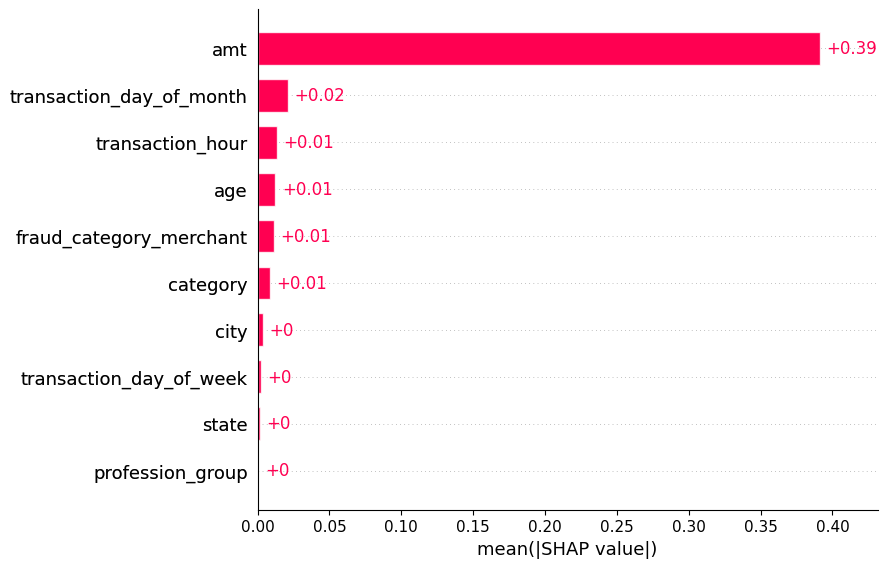

In [105]:
import shap
feature_names = X_train_sin_atipico_filtro.columns
#explainer = shap.KernelExplainer(modelo_best_randomNB.predict_proba, X_train_sin_atipico_filtro)

K = 4  # Número de muestras que deseas usar para el fondo
X_background = shap.sample(X_train_sin_atipico_filtro, K)

# Crear el objeto explainer utilizando el conjunto de fondo reducido
explainer = shap.KernelExplainer(modelo_best_randomNB.predict_proba, X_background)
shap_values = explainer(X_train_sin_atipico_filtro)
shap.plots.bar(shap_values[:,:,0], max_display=X_train_sin_atipico_filtro.shape[1])

# Evaluación

Sacar todas esta métricas de clasificación:

acurracy, precision, recall, f1score y espicificidad de todo el modelo

matriz de reporte de la matriz de confusión

gráfica de la matriz de confusión

auc

curva roc

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Calcula métricas
accuracy = accuracy_score(y_test, y_pred_testNB)
precision = precision_score(y_test, y_pred_testNB)
recall = recall_score(y_test, y_pred_testNB)
f1 = f1_score(y_test, y_pred_testNB)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_testNB).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.9440389294403893
Precision: 0.8018575851393189
Recall: 0.7275280898876404
F1-score: 0.7628865979381443
Specificity: 0.974613248710829



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2521
           1       0.80      0.73      0.76       356

    accuracy                           0.94      2877
   macro avg       0.88      0.85      0.87      2877
weighted avg       0.94      0.94      0.94      2877



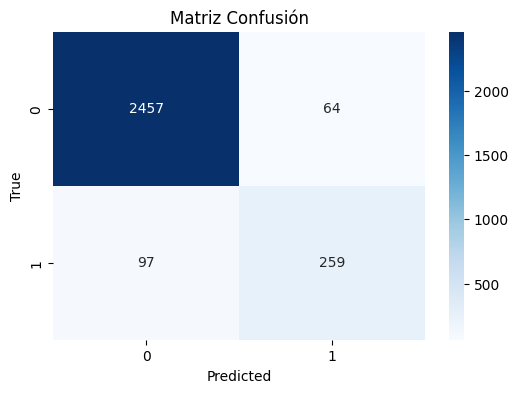

In [108]:
# Reporte matriz de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_testNB))

# Matriz Confusion
cm = confusion_matrix(y_test, y_pred_testNB)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz Confusión")
plt.show()

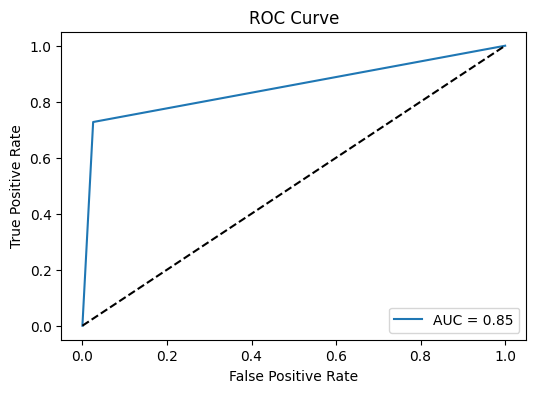

In [109]:
# AUC y Curva ROC
auc = roc_auc_score(y_test, y_pred_testNB)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testNB)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Visualización de Clases y Frontera de Decisión

In [110]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneNB = modelo_best_randomNB.predict(X_test_filtro)

# Crear un DataFrame para facilitar la visualización
trainNB = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainNB['is_fraud'] = y_train_sin_atipico  # Agregar la columna is_fraud al DataFrame de entrenamiento

testNB = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testNB['Predicted'] = y_pred_tsneNB  # Agregar las predicciones al DataFrame de prueba# Configuración de los gráficos

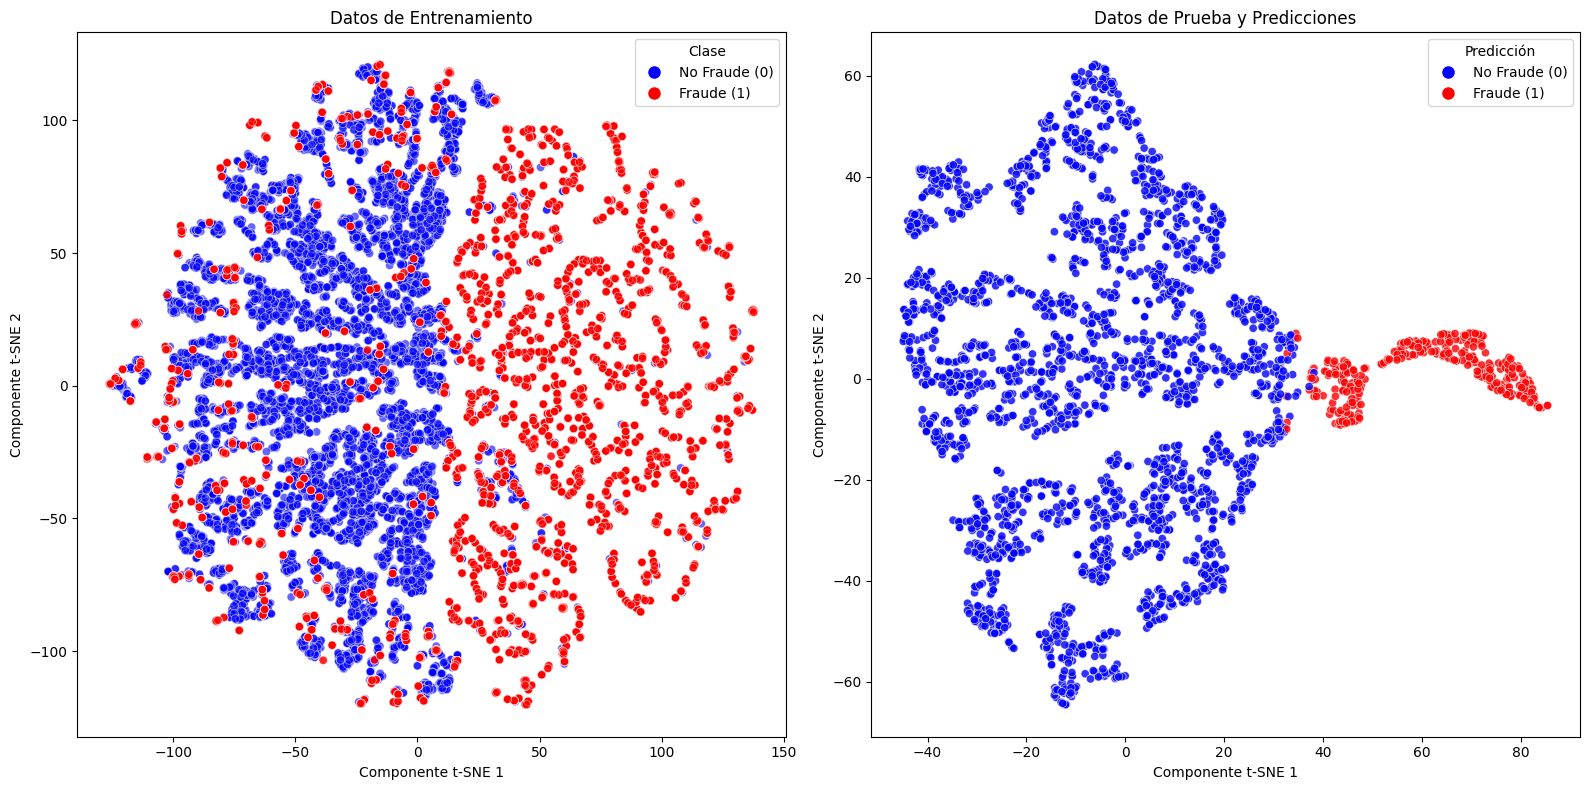

In [111]:
# Configuración de los gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Graficar datos de entrenamiento
sns.scatterplot(x='Component 1', y='Component 2', hue='is_fraud',
                palette=['blue', 'red'], alpha=0.6, data=trainNB, ax=axs[0],
                legend=False)  # Desactiva la leyenda automática
axs[0].set_title('Datos de Entrenamiento')
axs[0].set_xlabel('Componente t-SNE 1')
axs[0].set_ylabel('Componente t-SNE 2')

# Agregar la leyenda manualmente para el gráfico de entrenamiento
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraude (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraude (1)')]
axs[0].legend(handles=handles, title='Clase', loc='upper right')

# Graficar datos de prueba
sns.scatterplot(x='Component 1', y='Component 2', hue='Predicted',
                palette=['blue', 'red'], alpha=0.8, data=testNB, marker='o', ax=axs[1],
                legend=False)  # Desactiva la leyenda automática
axs[1].set_title('Datos de Prueba y Predicciones')
axs[1].set_xlabel('Componente t-SNE 1')
axs[1].set_ylabel('Componente t-SNE 2')

# Agregar la leyenda manualmente para el gráfico de prueba
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraude (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraude (1)')]
axs[1].legend(handles=handles, title='Predicción', loc='upper right')

plt.tight_layout()
plt.show()